In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# 1. Data Importing

In [2]:
import pandas as pd
data = pd.read_csv (r"churn.csv")

#first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Pre-Processing
1.Data Type and conversion

2.Identifying & Treatment Missing Value

2.1. Data Type and conversion

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


2.2. Identifying & Treatment Missing Value

In [12]:
data['TotalCharges'] =data["TotalCharges"].replace(" ",np.nan).astype(float) 


In [13]:
# count the number of NaN values in each column
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group         0
dtype: int64

In [14]:
data.TotalCharges.fillna(data.TotalCharges.mean(),inplace=True) # one column at a time bb

In [15]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Tenure to categorical column
def tenure_lab(data) :
    if data["tenure"] <= 6 :
        return "tenure_0_6"
    elif (data["tenure"] > 6) & (data["tenure"] <= 12 ):
        return "tenure_7_12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24) :
        return "tenure_13_24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "tenure_25-36"
    elif data["tenure"] > 36 :
        return "tenure_gt_36"
# banK = x
data["tenure_group"] = data.apply(lambda x :tenure_lab(x),axis = 1)

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,tenure_0_6
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,tenure_25-36
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,tenure_0_6
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,tenure_gt_36
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,tenure_0_6


In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,tenure_0_6
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,tenure_25-36
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,tenure_0_6
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,tenure_gt_36
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,tenure_0_6


<AxesSubplot:xlabel='MonthlyCharges'>

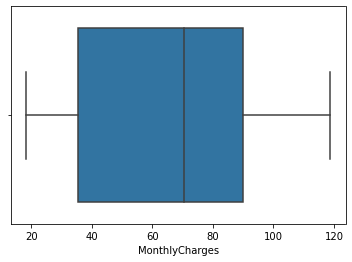

In [9]:
sns.boxplot(data.MonthlyCharges)

<AxesSubplot:xlabel='TotalCharges'>

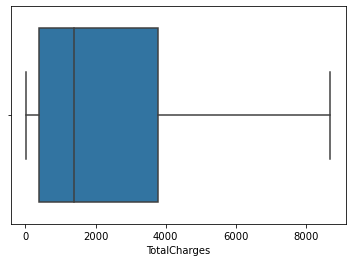

In [16]:
sns.boxplot(data.TotalCharges)

In [17]:
data.tenure_group.value_counts(dropna=False)

tenure_gt_36    3001
tenure_0_6      1481
tenure_13_24    1024
tenure_25-36     832
tenure_7_12      705
Name: tenure_group, dtype: int64

In [18]:
((3001+1481+1024)/7043)*100

78.1769132471958

* 78% of customer required loan tenure for more than a Year

# Data Visualization

Bad Rate Analysis

In [19]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
(1869/7043)*100 # 26% is bad rate in data 

26.536987079369588

In [21]:
import plotly.express as px

fig = px.pie(data,names='Churn',color='Churn',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# Reject customer data = Bad Customer

In [22]:
say_Yes= data[data["Churn"] == "Yes"]  # 269

say_Yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,tenure_0_6
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,tenure_0_6
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,tenure_7_12
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,tenure_25-36
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer,103.70,5036.30,Yes,tenure_gt_36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,No,No,No,12,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,tenure_7_12
7026,8775-CEBBJ,Female,No,No,No,9,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer,44.20,403.35,Yes,tenure_7_12
7032,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,tenure_0_6
7034,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card,102.95,6886.25,Yes,tenure_gt_36


In [23]:
fig = px.sunburst(say_Yes, path=["gender",'SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                                 'InternetService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                                    'tenure_group'])
fig.show()

Interpetation : - Trend Analysis

Customer == Male,Graduate,salaried & Tenure less than a year , Rural == Loan Rejected

customer == Male,Graduate,salaried & Tenure less than a year ,Urban == Loan Rejected

customer == Female,Graduate,salaried & Tenure <= 6 Months ,Rural == Loan Rejected

# 5. Breaking Data into Two Part
Quantitative Variable

Qualitative Variable

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,tenure_0_6
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,tenure_25-36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,tenure_0_6
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,tenure_gt_36
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,tenure_0_6


In [30]:
data.select_dtypes(include=[np.number]).columns.tolist()

['tenure', 'MonthlyCharges', 'TotalCharges']

In [31]:
# Qualitative Variable
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [32]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,tenure_0_6
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,tenure_25-36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,tenure_0_6


### Converting qualitative Variable into number

In [33]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,4
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


#  Combining the data set

In [34]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,2,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,4,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,0,2,70.70,151.65


# Data Partition

In [35]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Churn', axis = 1)
Y = Final_combined[['Churn']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Model building

# Hypothesis

H0 :- There is no log linear relationship between churn and all independent Variable
Vs

H1 :- There is log linear relationship between churn and all independent Variable

Alpha = 0.05 (5%)

# Method 1 - Logistics Regression

In [ ]:
#Needed to run the logistic regression import statsmodels.formula.api as smf result=smf.logit("Loan_Status~C(Gender)+C(Married)+C(Education)+C(Self_Employed)+C(Previous_Loan_Taken)+C(Property_Area)+C(Customer_Bandwith)+C(Tenure_group)+Age+Dependents+LoanAmount+Cibil_Score+ApplicantIncome",data=train).fit() 
print(result.summary2())

# Method 2 - Logistics Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [38]:
output.intercept_  # beto

array([-0.12867525])

In [39]:
output.coef_  # Beta 1 --

array([[-0.05494547,  0.14609746, -0.06402728, -0.16364932, -0.20285   ,
         0.14227346, -0.03319367, -0.38174671, -0.16432896, -0.1277741 ,
        -0.37662806,  0.00609108,  0.062996  , -0.42093881,  0.17154137,
         0.0038895 , -0.02332063, -0.06737324,  0.013249  ,  0.00043797]])

In [40]:
output.n_features_in_

20

In [41]:
output.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'tenure_group', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype=object)

We Reject Ho

There is log linear relationship between Loan_Status and

Married,Previous_Loan_Taken,Customer_Bandwith,Cibil_Score

# Step 6 : Predictions on Train Dataset¶

In [43]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,tenure,MonthlyCharges,TotalCharges,Churn
7011,0,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,0,4,60.40,272.15,1
3323,0,0,0,1,1,0,2,1,1,1,...,1,1,0,0,3,2,28,20.25,535.35,0
4102,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,2,3,7,44.75,333.65,0
4234,0,0,0,0,1,0,2,1,1,1,...,1,1,1,0,3,1,16,19.05,326.65,0
3610,0,0,0,0,1,2,1,0,0,2,...,2,2,0,1,0,3,12,100.15,1164.30,1


In [44]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,tenure,MonthlyCharges,TotalCharges,Churn,Predicted
7011,0,0,0,0,1,0,0,2,2,0,...,0,0,1,3,0,4,60.40,272.15,1,0
3323,0,0,0,1,1,0,2,1,1,1,...,1,0,0,3,2,28,20.25,535.35,0,0
4102,1,0,1,1,1,0,0,0,0,0,...,0,0,0,2,3,7,44.75,333.65,0,0
4234,0,0,0,0,1,0,2,1,1,1,...,1,1,0,3,1,16,19.05,326.65,0,0
3610,0,0,0,0,1,2,1,0,0,2,...,2,0,1,0,3,12,100.15,1164.30,1,1


# Step 7 : Model Performance Metrics

In [45]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Churn'])
matrix

array([[3675,  683],
       [ 463,  813]], dtype=int64)

In [46]:
Accuracy_Train=((3681+791)/(5634)*100)
print(Accuracy_Train)

79.37522186723464


* Accuracy of Model is 79% , So we say Model good fit data 

In [47]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.64      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



* Accuracy of  Model is 84%,Hence Model is good Fit 

* Accuracy of Bad Customer Capture by Model is 53% ( Sensitivity )

* Accuracy of Good Customer Capture by Model is 89% (Specificity)

# Step 8 : Predictions on Test Dataset

In [50]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,tenure,MonthlyCharges,TotalCharges,Churn
6046,0,0,0,0,1,0,1,0,0,2,...,0,2,0,1,1,3,9,85.3,781.40,0
6494,0,0,0,1,0,1,0,0,0,2,...,0,0,0,1,3,2,26,29.8,786.50,0
2702,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2,0,1,44.0,44.00,0
1532,1,0,0,0,1,0,2,1,1,1,...,1,1,0,0,1,1,14,19.6,300.40,0
3999,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,2,0,2,69.6,131.65,1


In [51]:
test['Predicted']=output.predict(X_test)
test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,tenure,MonthlyCharges,TotalCharges,Churn,Predicted
6046,0,0,0,0,1,0,1,0,0,2,...,2,0,1,1,3,9,85.3,781.40,0,1
6494,0,0,0,1,0,1,0,0,0,2,...,0,0,1,3,2,26,29.8,786.50,0,0
2702,1,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,1,44.0,44.00,0,1
1532,1,0,0,0,1,0,2,1,1,1,...,1,0,0,1,1,14,19.6,300.40,0,0
3999,0,1,0,0,1,0,1,0,0,0,...,0,0,1,2,0,2,69.6,131.65,1,1


# Step 9 : Model Performance Metrics on Test data

In [52]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Churn'])
print(matrix)

[[945 159]
 [ 91 214]]


In [53]:
Accuracy_test=((947+202)/(1409)*100)
Accuracy_test

81.5471965933286

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.82      0.82      0.82      1409



* Accuracy of  Model is 81%,Hence Model is good Fit 

* Accuracy of Bad Customer Capture by Model is 54% ( Sensitivity )

* Accuracy of Good Customer Capture by Model is 91% 

# Coefficient
For future Prediction below 4 variable data is mandatory

Note :- If anyone is not present output will not be reliable

In [56]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-0.128675


In [57]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [58]:
rows=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

abc=pd.DataFrame(output.coef_.T,index=rows,columns=['Coefficient'])
abc

,Coefficient
gender,-0.054945
SeniorCitizen,0.146097
Partner,-0.064027
Dependents,-0.163649
tenure,-0.202850
PhoneService,0.142273
MultipleLines,-0.033194
InternetService,-0.381747
OnlineSecurity,-0.164329
OnlineBackup,-0.127774


In [59]:
Model_Values.append(abc)

,Coefficient
Intercept,-0.128675
gender,-0.054945
SeniorCitizen,0.146097
Partner,-0.064027
Dependents,-0.163649
tenure,-0.202850
PhoneService,0.142273
MultipleLines,-0.033194
InternetService,-0.381747
OnlineSecurity,-0.164329


## Finish